# Time Series Data

Table of Contents
1. Import Libraries and Data
2. Subsetting, Wrangling and Cleaning Data
3. Time Series Analysis Decomposition
4. Stationarizing the Data

## 1. Import Libraries and Data

In [49]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [50]:
# Configure API key 
quandl.ApiConfig.api_key = 'yXUKZU6Z4Ck7j4P4nxLB'

In [51]:
# Importing Consumer Price Index Data for Germany
# https://data.nasdaq.com/data/RATEINF-inflation-rates
data = quandl.get('RATEINF/CPI_DEU')

In [52]:
data.head(5)

,Value
Date,
1991-01-31,64.0
1991-02-28,64.3
1991-03-31,64.3
1991-04-30,64.5
1991-05-31,64.7


In [53]:
data.shape

(388, 1)

In [54]:
data.columns

Index(['Value'], dtype='object')

In [55]:
type(data)

pandas.core.frame.DataFrame

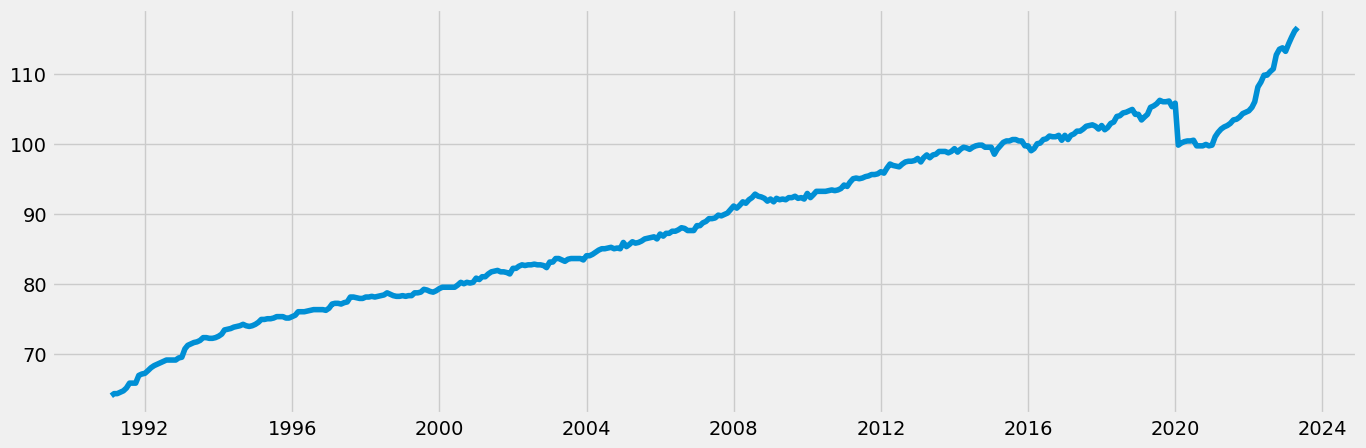

In [56]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

## 2. Subsetting, Wrangling and Cleaning Data

In [57]:
# Reset index so that you can use the "Date" column as a filter
data_2 = data.reset_index()

In [58]:
data_2.head()

,Date,Value
0,1991-01-31,64.0
1,1991-02-28,64.3
2,1991-03-31,64.3
3,1991-04-30,64.5
4,1991-05-31,64.7


In [59]:
# Reducing data set to 20 years of data
data_sub = data_2.loc[(data_2['Date'] >= '1993-06-01') & (data_2['Date'] < '2023-06-01')]

In [60]:
data_sub.shape

(359, 2)

In [61]:
data_sub.head()

,Date,Value
29,1993-06-30,71.9
30,1993-07-31,72.3
31,1993-08-31,72.3
32,1993-09-30,72.2
33,1993-10-31,72.2


In [62]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1993-06-30,71.9
1993-07-31,72.3
1993-08-31,72.3
1993-09-30,72.2
1993-10-31,72.2


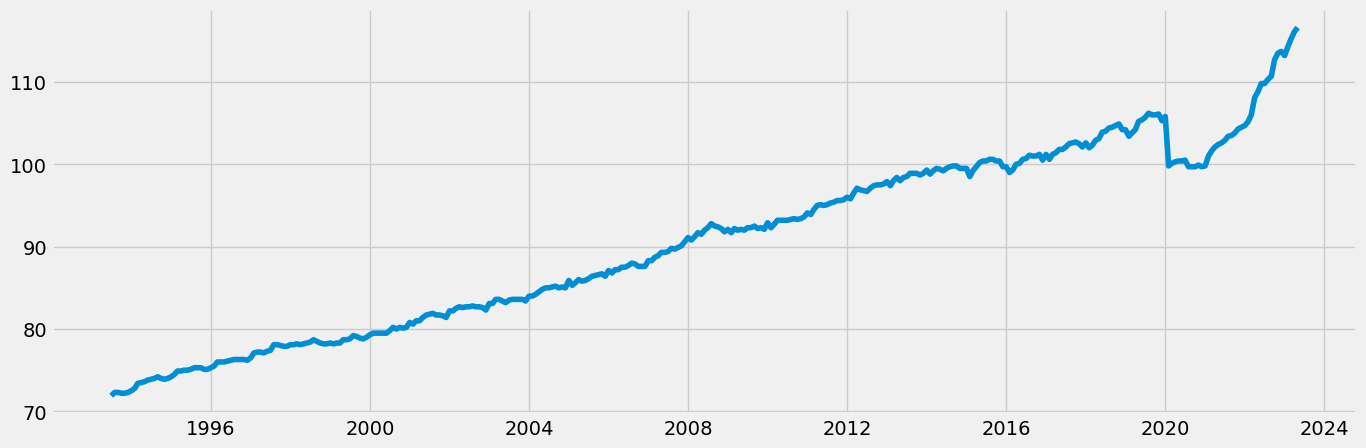

In [63]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [64]:
# Check for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

In [65]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()

151

In [66]:
print(dups)

datetime
1993-06-30    False
1993-07-31    False
1993-08-31     True
1993-09-30    False
1993-10-31     True
              ...  
2022-12-31    False
2023-01-31    False
2023-02-28    False
2023-03-31    False
2023-04-30    False
Length: 359, dtype: bool


In [67]:
# create new dataframe with no duplicates
no_dups = data_sub.drop_duplicates()

In [68]:
no_dups.shape

(208, 1)

In [69]:
df_string = no_dups.to_string()

In [70]:
print(df_string)

            Value
datetime         
1993-06-30   71.9
1993-07-31   72.3
1993-09-30   72.2
1993-12-31   72.5
1994-01-31   72.8
1994-02-28   73.4
1994-03-31   73.5
1994-04-30   73.6
1994-05-31   73.8
1994-06-30   73.9
1994-07-31   74.0
1994-08-31   74.2
1995-01-31   74.5
1995-02-28   74.9
1995-04-30   75.0
1995-06-30   75.1
1995-07-31   75.3
1996-01-31   75.5
1996-02-29   76.0
1996-05-31   76.1
1996-06-30   76.2
1996-07-31   76.3
1996-12-31   76.5
1997-01-31   77.1
1997-02-28   77.2
1997-05-31   77.3
1997-06-30   77.4
1997-07-31   78.1
1997-09-30   78.0
1997-10-31   77.9
1998-02-28   78.2
1998-05-31   78.3
1998-06-30   78.4
1998-07-31   78.7
1998-08-31   78.5
1999-06-30   78.8
1999-07-31   79.2
1999-08-31   79.1
1999-09-30   78.9
1999-11-30   79.0
1999-12-31   79.3
2000-01-31   79.5
2000-06-30   79.8
2000-07-31   80.2
2000-08-31   80.0
2000-10-31   80.1
2000-12-31   80.8
2001-01-31   80.6
2001-02-28   81.0
2001-04-30   81.4
2001-05-31   81.7
2001-06-30   81.8
2001-07-31   81.9
2001-10-31

#### Note: 20 years of data should reflect 240 months.  We started with 359 observations (months of data) and now have 208 observations.  While we're closer to 240, it's still not exact.

## 3. Time-Series Analysis: Decomposition

In [71]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(no_dups, model='additive', period = 1)

In [72]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

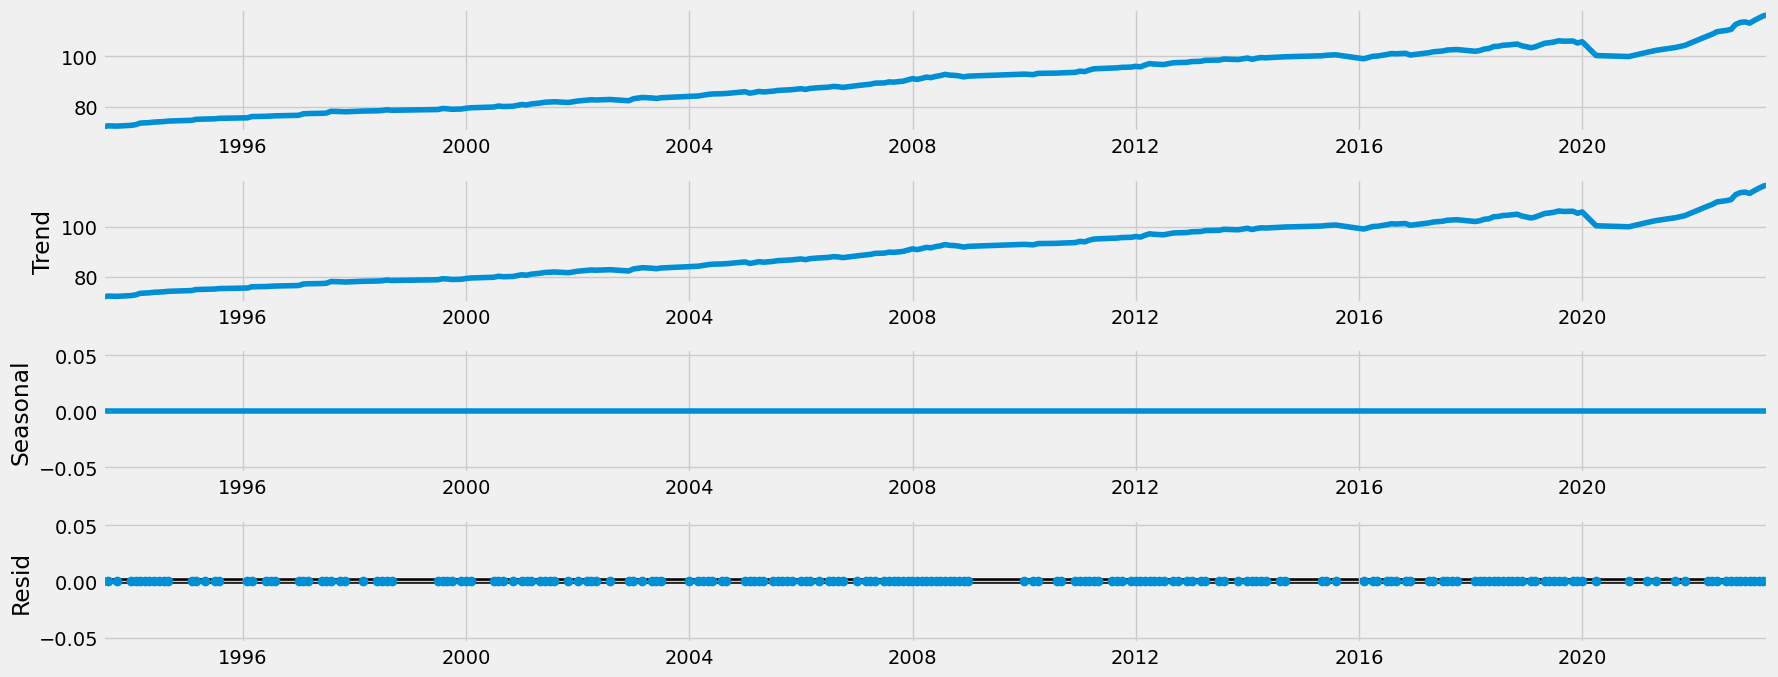

In [73]:
# Plot the separate components
decomposition.plot()
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(no_dups['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.979113
p-value                          0.994041
Number of Lags Used             10.000000
Number of Observations Used    197.000000
Critical Value (1%)             -3.463987
Critical Value (5%)             -2.876326
Critical Value (10%)            -2.574652
dtype: float64


#### Note: The test statistic is larger than the critical value, so there is no unit root.

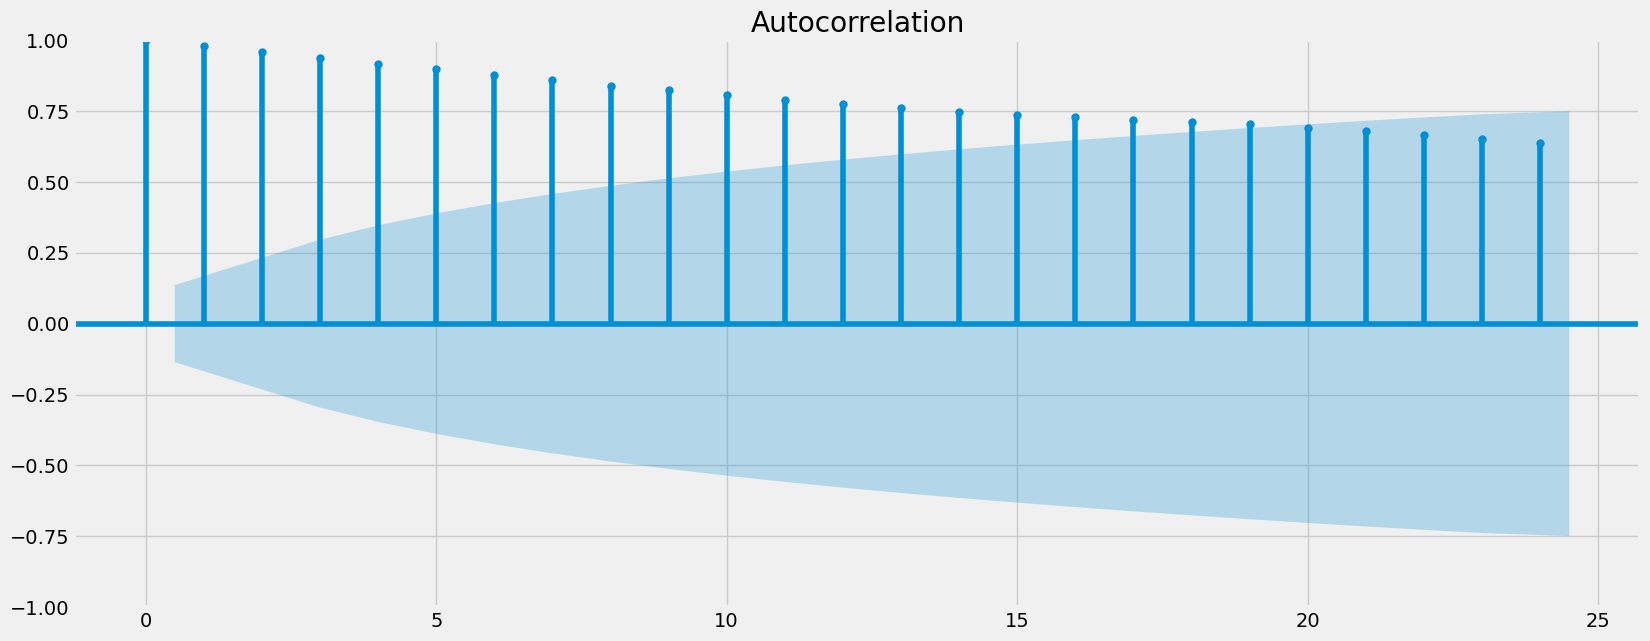

In [75]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(no_dups)
plt.show()

## 4. Stationarizing the Consumer Price Index Data

In [76]:
data_diff = no_dups - no_dups.shift(1)

In [77]:
# remove missing values
data_diff.dropna(inplace = True)

In [78]:
data_diff.head()

,Value
datetime,
1993-07-31,0.4
1993-09-30,-0.1
1993-12-31,0.3
1994-01-31,0.3
1994-02-28,0.6


In [79]:
data_diff.columns

Index(['Value'], dtype='object')

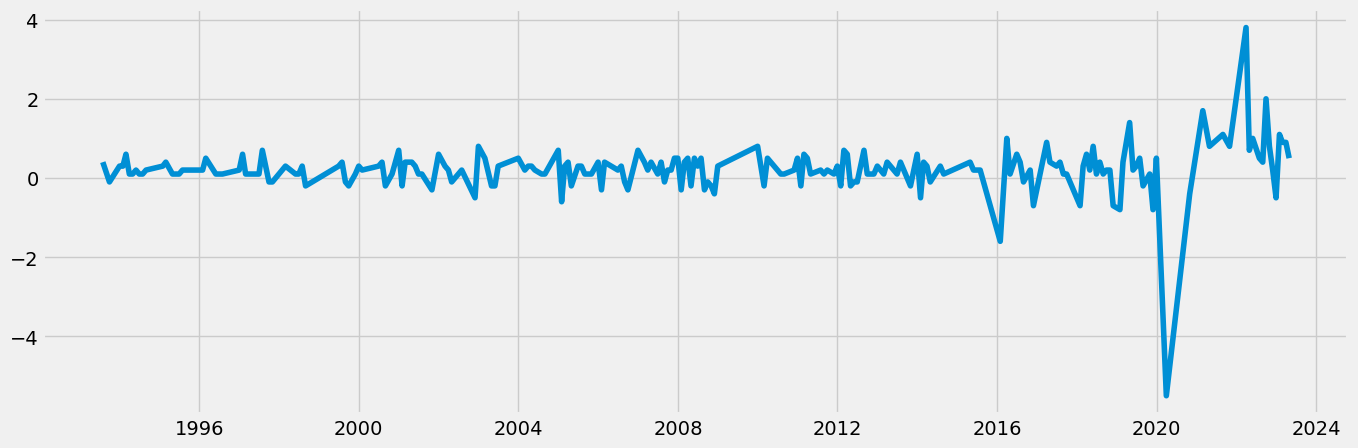

In [80]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [81]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.941504
p-value                          0.001750
Number of Lags Used              9.000000
Number of Observations Used    197.000000
Critical Value (1%)             -3.463987
Critical Value (5%)             -2.876326
Critical Value (10%)            -2.574652
dtype: float64


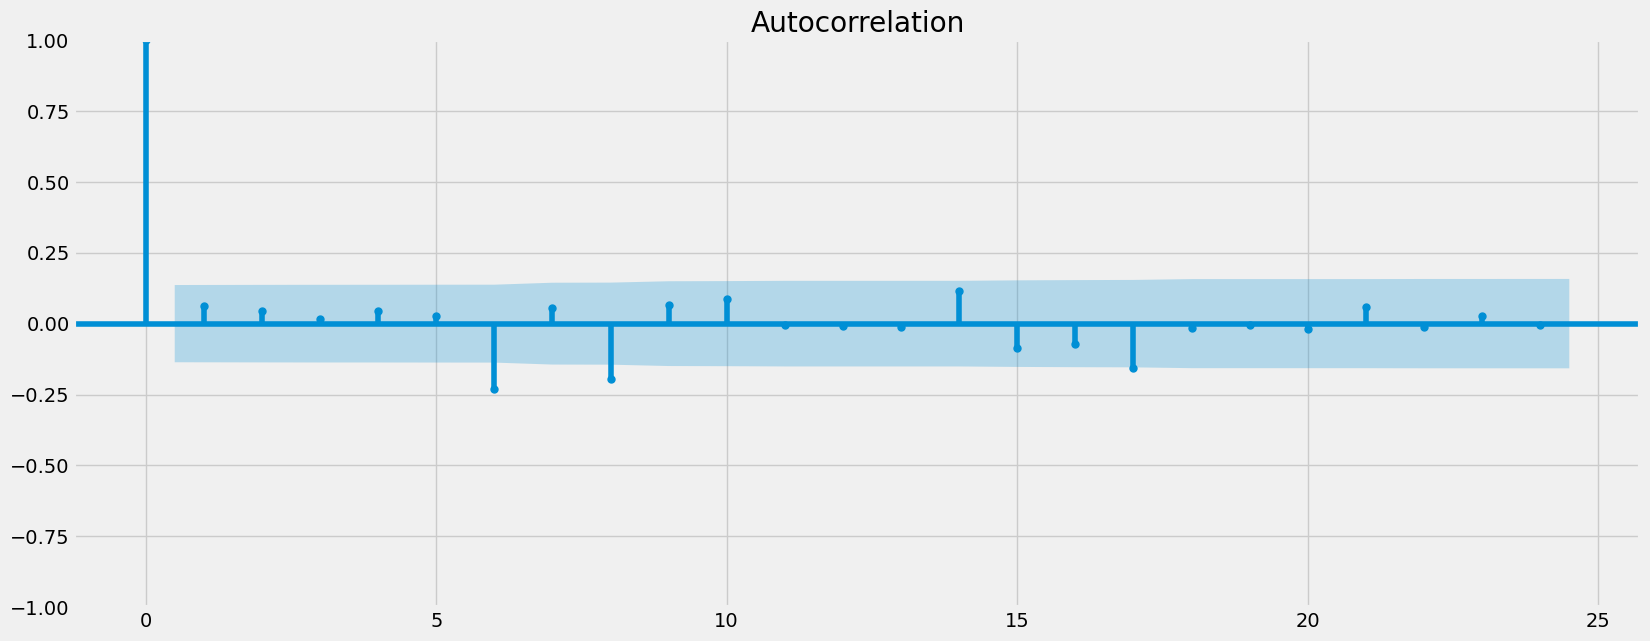

In [82]:
plot_acf(data_diff)
plt.show()

#### Note: The lag lines are now within the confidence level shading enough to indicate success.